#EXPLORATORY DATA ANALYSIS ON IBM EMPLOYEE ATTRITION 

##BACKGROUND

IBM is an American MNC operating in around 170 countries with major business verticals as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.



RESOURCE: [IBM DATASET ON KAGGLE](https://www.kaggle.com/datasets/yasserh/ibm-attrition-dataset)

###  Q1: What do you think are the 3 factors behind employee attrition?

## 1. IMPORTING LIBRAIRIES

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2 DATA EXTRACTION FORM DATABASE

The data is extracted from the database using SQL after which it is saved in a dataframe using Pandas.

The dictionary of the categorical data is given below





```{
    "education": {
        "1": "Below College",
        "2": "College",
        "3": "Bachelor",
        "4": "Master",
        "5": "Doctor"
    },
    "envrionmentSatisfaction": {
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    },
    "jobInvolvement": {
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    },
    "jobSatisfaction": {
        "1": "Low",
        "2": "Medium",
        "3": "High",
        "4": "Very High"
    },
    "performanceRating": {
        "1": "Low",
        "2": "Good",
        "3": "Excellent",
        "4": "Outstanding"
    },
    "relationshipSatisfaction": {
        "1": "Low",
        "2": "Good",
        "3": "Excellent",
        "4": "Outstanding"
    },
    "workLifeBalance": {
        "1": "Bad",
        "2": "Good",
        "3": "Better",
        "4": "Best"
    }
}```

In [2]:
#loading of python module for sql

%load_ext sql

In [3]:


%%sql 

sqlite:///attr_data.db

'Connected: @attr_data.db'

In [4]:
#code to get show the tables present in the database


In [5]:

%%sql

SELECT name FROM sqlite_master;

 * sqlite:///attr_data.db
Done.


name
attrition_records
sqlite_sequence


In [6]:
#getting the count of the rows in the data

In [7]:

%%sql

SELECT COUNT(*) FROM attrition_records

 * sqlite:///attr_data.db
Done.


COUNT(*)
1470


In [8]:


%%sql




SELECT * FROM attrition_records
LIMIT 5;

 * sqlite:///attr_data.db
Done.


id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
#extracting the data from the database to a dataframe 
attrition_data=pd.read_sql_table("attrition_records", "sqlite:///attr_data.db" )

# 3 DATA  EXPLORATION AND CLEANING

The data is explored using different (.head, .info . describe) methods of Pandas library

In [10]:
#checking the data if it has the same rows and columns as the table from which it was copied from
attrition_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [11]:
#checking for any NA column in the data
attrition_data.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

The dataset has no missing values. Hence, no exhaustive cleaning is required pertaining to the missing values

In [12]:
attrition_data.head(15)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


### Getting the summary statistics for the numerical data



In [13]:
attrition_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The summary statistics shows that the column EmployeeCount has a `mean `and `median` equal to 1 and its  `std` of zero, meaning it has no diiferent values,all the values are the same. This column can be dropped because it has no effect on the data. Looking at the values of the EmployeeNumber also shows that it is like the ID of each employee in the company. This also have no relationship with attribution. Therefore the two columns will be dropped. 


In [62]:
attrition_data.drop(["EmployeeCount", "EmployeeNumber"], axis=1,inplace=True)
attrition_data.head()
attrition_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###  Getting the categorical variables in the dataset

In [15]:
#Using the  The given categorical data from the dictionary of the data 
dictionary_of_data={ "Education": { "1": "Below College", "2": "College", "3": "Bachelor", "4": "Master", "5": "Doctor" }, "EnvironmentSatisfaction": { "1": "Low", "2": "Medium", "3": "High", "4": "Very High" }, "JobInvolvement": { "1": "Low", "2": "Medium", "3": "High", "4": "Very High" }, "JobSatisfaction": { "1": "Low", "2": "Medium", "3": "High", "4": "Very High" }, "PerformanceRating": { "1": "Low", "2": "Good", "3": "Excellent", "4": "Outstanding" }, "RelationshipSatisfaction": { "1": "Low", "2": "Good", "3": "Excellent", "4": "Outstanding" }, "WorkLifeBalance": { "1": "Bad", "2": "Good", "3": "Better", "4": "Best" } }

categorical_data=list(dictionary_of_data)
#splitting the dataset according to their data type
object_data=[var for var in attrition_data.columns if attrition_data[var].dtype=="O"]
int_data=[var for var in attrition_data.columns if  attrition_data[var].dtype!="O"]


In [63]:
# classifying the dataset into numerical and categorical
categorical_data.extend(object_data)
print(categorical_data)

['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


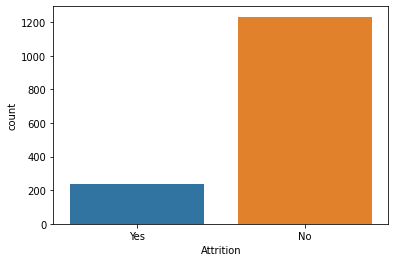

In [61]:
#getting the distribution of the Attrition column
sns.countplot(data=attrition_data, x="Attrition")
plt.show()

The plot above indicates that target variable is imbalanced.

The above plot indicates that the Attrition column has about 1200 NOs and about 300 Yes in the dataset. 

# 4 ANALYSIS AND VISUALIZATION

###  Analysis of quantitative variables against the target variable.

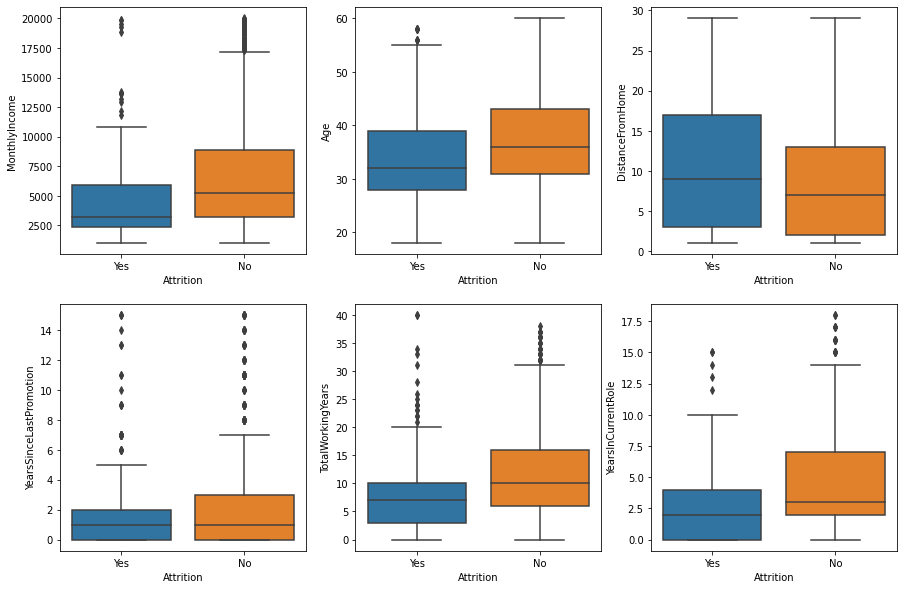

In [ ]:
#Comparing numerical data with attrition using boxplots to find association between the variables

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
sns.boxplot(data=attrition_data, x="Attrition", y="MonthlyIncome")

plt.subplot(2,3,2)
sns.boxplot(data=attrition_data, x="Attrition", y= "Age")

plt.subplot(2,3,3)
sns.boxplot(data=attrition_data, x="Attrition", y= "DistanceFromHome")

plt.subplot(2,3,4)
sns.boxplot(data=attrition_data, x="Attrition", y= "YearsSinceLastPromotion")

plt.subplot(2,3,5)
sns.boxplot(data=attrition_data, x="Attrition", y= "TotalWorkingYears")


plt.subplot(2,3,6)
sns.boxplot(data=attrition_data, x="Attrition", y= "YearsInCurrentRole")
plt.show()

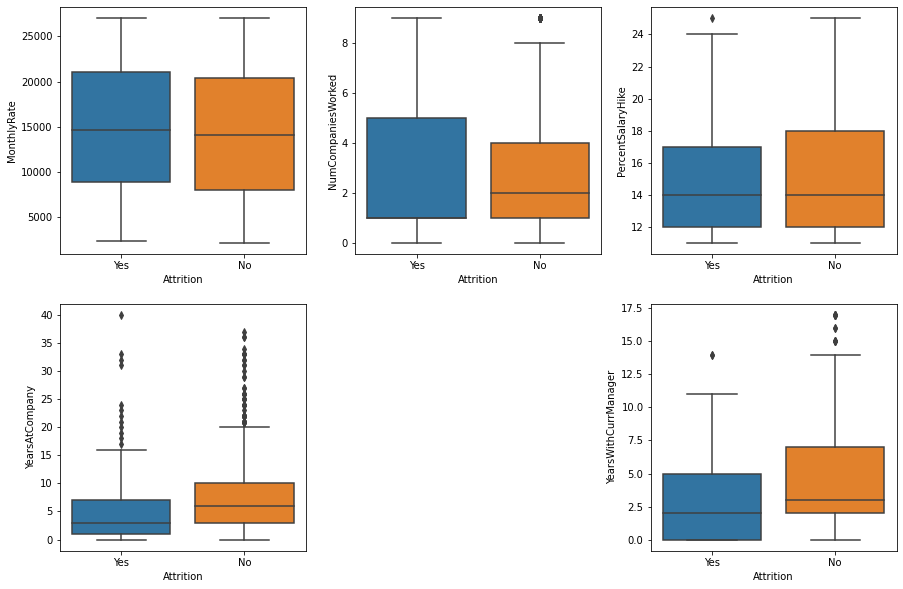

In [ ]:
#checking other numerical data with attriton feature

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
sns.boxplot(data=attrition_data, x="Attrition", y="MonthlyRate")

plt.subplot(2,3,2)
sns.boxplot(data=attrition_data, x="Attrition", y= "NumCompaniesWorked")

plt.subplot(2,3,3)
sns.boxplot(data=attrition_data, x="Attrition", y= "PercentSalaryHike")


plt.subplot(2,3,4)
sns.boxplot(data=attrition_data, x="Attrition", y= "YearsAtCompany")


plt.subplot(2,3,6)
sns.boxplot(data=attrition_data, x="Attrition", y= "YearsWithCurrManager")
plt.show()

From the above visualizations, it is seen that features that have significant effect on attrition are 

*   NumCompaniesWorked
*   DistanceFromHome

The plots above indicates that NumberofcomaniesWorked and DistanceFromHome for attrition tend to be higher and have more variation.

This can be further visualized with a barplot



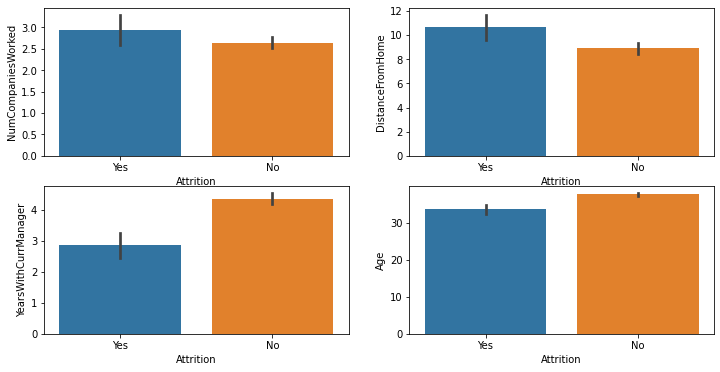

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)

sns.barplot(data=attrition_data,x="Attrition", y="NumCompaniesWorked")
plt.subplot(2,2,2)
sns.barplot(data=attrition_data,x="Attrition", y="DistanceFromHome")
plt.subplot(2,2,3)
sns.barplot(data=attrition_data,x="Attrition", y="YearsWithCurrManager")

plt.subplot(2,2,4)

sns.barplot(data=attrition_data,x="Attrition", y="Age")

plt.show()


The barplot confirms that the NumCompaniesWorked and DistanceFromHome affects attrition while that the YearsWithCurrManager and Age does not associate with the Attrition(Yes)

Analysis of categorical variables against the target variable.

In [ ]:
attrition_data[categorical_data]

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2,2,3,4,3,1,1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,1,3,2,2,4,4,3,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,2,4,2,3,3,2,3,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,4,4,3,3,3,3,3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,1,1,3,2,3,4,3,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,3,4,4,3,3,3,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,1,4,2,1,3,1,3,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,3,2,4,2,4,2,3,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,3,4,2,2,3,4,2,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [22]:
#checking the number of unique values in each category
for var in categorical_data:
  print(var)
  print(f"{attrition_data[var].unique()},No of unique categories:  {attrition_data[var].nunique()} \n")



Education
[2 1 4 3 5],No of unique categories:  5 

EnvironmentSatisfaction
[2 3 4 1],No of unique categories:  4 

JobInvolvement
[3 2 4 1],No of unique categories:  4 

JobSatisfaction
[4 2 3 1],No of unique categories:  4 

PerformanceRating
[3 4],No of unique categories:  2 

RelationshipSatisfaction
[1 4 2 3],No of unique categories:  4 

WorkLifeBalance
[1 3 2 4],No of unique categories:  4 

Attrition
['Yes' 'No'],No of unique categories:  2 

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'],No of unique categories:  3 

Department
['Sales' 'Research & Development' 'Human Resources'],No of unique categories:  3 

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'],No of unique categories:  6 

Gender
['Female' 'Male'],No of unique categories:  2 

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research

The categories of the categorical variables are shown above with the JobRole column having more catergories than the others. The column Over18 has just one category and this is cannot be useful in determinning an employee's attrition since it has uniform 

Use of a histplot and countplot for plotting the categorical variables against attrition to find if there is any relationship between them.

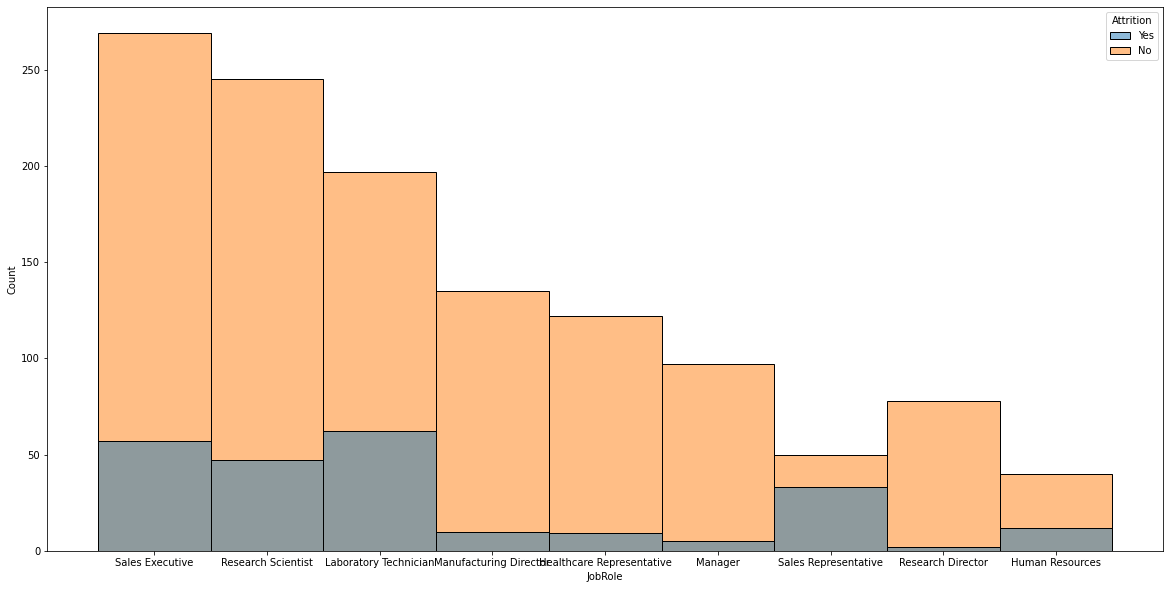

In [65]:
plt.figure(figsize=(20,10))

sns.histplot(attrition_data, x="JobRole", hue="Attrition")

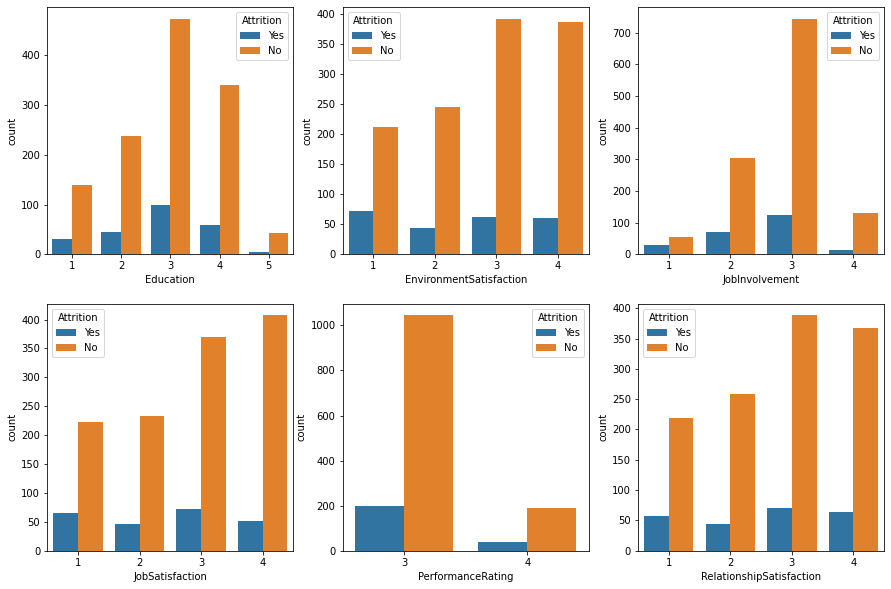

In [27]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(data=attrition_data,x="Education",hue="Attrition")

plt.subplot(2,3,2)
sns.countplot(data=attrition_data,x="EnvironmentSatisfaction", hue="Attrition")

plt.subplot(2,3,3)
sns.countplot(data=attrition_data,x="JobInvolvement", hue="Attrition")

plt.subplot(2,3,4)

sns.countplot(data=attrition_data,x="JobSatisfaction", hue="Attrition")

plt.subplot(2,3,5)

sns.countplot(data=attrition_data,x="PerformanceRating", hue="Attrition")

plt.subplot(2,3,6)

sns.countplot(data=attrition_data,x="RelationshipSatisfaction", hue="Attrition")

plt.show()

In [ ]:
print(categorical_data)

['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


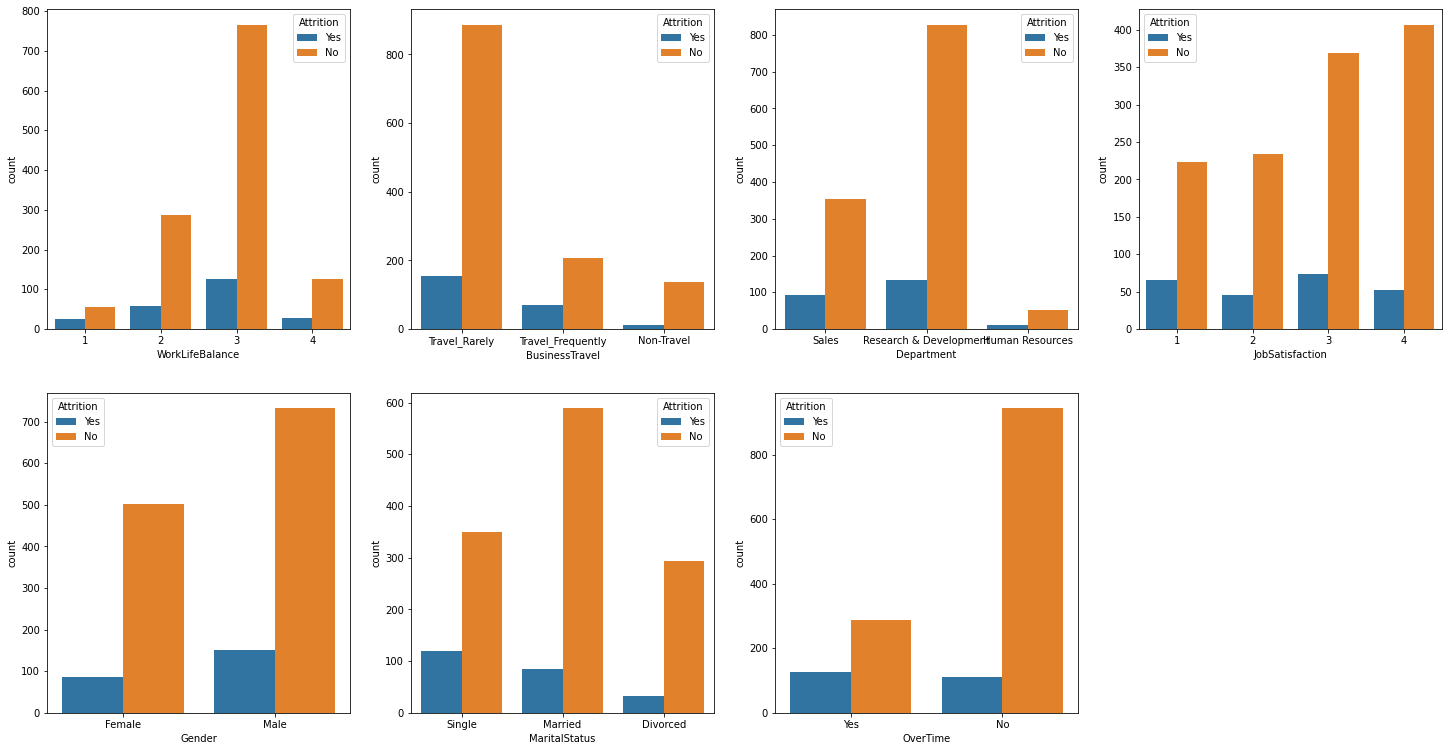

In [29]:
plt.figure(figsize=(25,20))

plt.subplot(3,4,1)
sns.countplot(data=attrition_data,x="WorkLifeBalance",hue="Attrition")

plt.subplot(3,4,2)
sns.countplot(data=attrition_data,x="BusinessTravel", hue="Attrition")

plt.subplot(3,4,3)
sns.countplot(data=attrition_data,x="Department", hue="Attrition")

plt.subplot(3,4,4)

sns.countplot(data=attrition_data,x="JobSatisfaction", hue="Attrition")


plt.subplot(3,4,5)

sns.countplot(data=attrition_data,x="Gender", hue="Attrition")


plt.subplot(3,4,6)

sns.countplot(data=attrition_data,x="MaritalStatus", hue="Attrition")


plt.subplot(3,4,7)

sns.countplot(data=attrition_data,x="OverTime", hue="Attrition")




plt.show()

The prominent column associated with the Employee Attrition si the Gender . The Gender column shows that there are less females than males invlved in Employee Attrition in the company.

# **Answer 1**  

Therefore the three major factors behind Employee Attrition in The IBM datset are 

1 NumCompaniesWorked


2 DistanceFromHome

3 Gender



### Q2:What is the relationship between Education and Monthly Income?

The relationship Education(categorical data) and Monthly Income(quantitative) data can be seen with the use of a boxplot

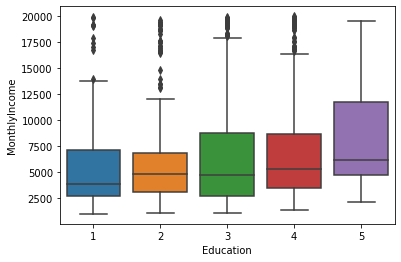

In [33]:
sns.boxplot(data=attrition_data, x="Education", y="MonthlyIncome")

It can be deduced that the higher the level of Education, the higher the median Monthly Income of an employee. This can be further visualized with a barplot.

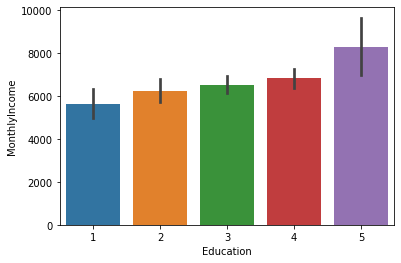

In [39]:
sns.barplot(data=attrition_data, x="Education", y="MonthlyIncome")

The barplot further shows that there is an increase in the montly Income of an Employee as the level of Education increases. 


# **ANSWER 2**

**The higher the level of Education, the higher the Monthly Income.**


### Q3: What is the effect of age on attrition?

A boxplot can be used for visualizing the relationship between the age and attrition

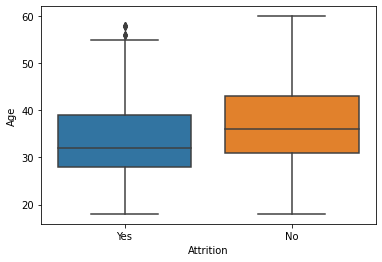

In [66]:
sns.boxplot(data=attrition_data, x="Attrition", y="Age")

# **ANSWER 3:** 

**The above plots indicates that the median age associated with Employee Attrition(YES) is around 32. This implies that the younger an employee is, the higher the probability that the employee will leave IBM**

## Q4: Is Income the main factor in employee attrition?

Plotting the MontlyIncome vs Attrition usiung a barplot and histplot

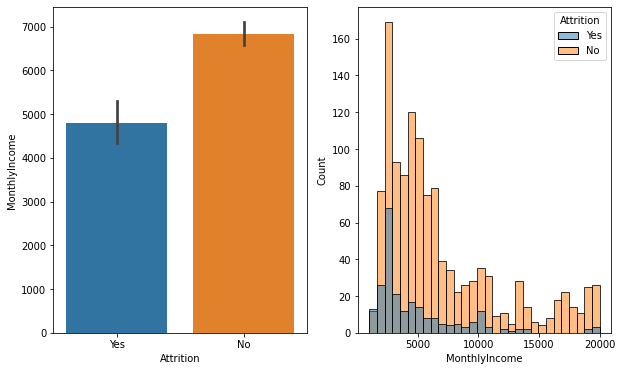

In [55]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.barplot(data=attrition_data, x="Attrition", y="MonthlyIncome")

plt.subplot(1,2,2)
sns.histplot(data=attrition_data, x="MonthlyIncome", hue="Attrition", bins=30)

 ANSWER 4:
 
 From the above plot, it can be seen that the higher the income, the lesser the chance of Emloyee attrition. This shows that Employee Attriton is associated with the income of an Employee, though there are a few outliers in the data where Empoyees with a high income still quit their job. 

 Income is not the main factor of Employee Attrition



### Q5: How does work-life balance impact the overall attrition rate?

Using countplot to visualize the Count of Attrition( Yes and No) for each category of WorkLifeBalance

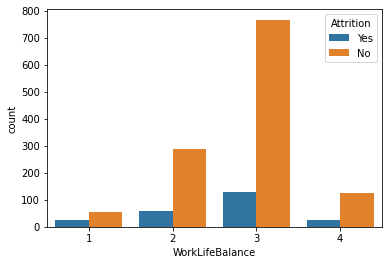

In [60]:
sns.countplot(data=attrition_data, x="WorkLifeBalance", hue="Attrition")

**# ANSWER 5**

**It is seen that Employees that have a bad and best WorkLife balance have a lower attrition rate, while those in between, i.e Good and Better WorkLifeBalance have higher attrition rate.**

